In [1]:
# Load libs:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from glob import glob
from os.path import dirname, abspath, join, exists

from clearml import Task

from amplify.data import DataGenerator, DataSplit

In [2]:
# ClearML Stuff
task = Task.init(project_name="amplify", task_name="predict_power_gen_initial_model")

ClearML Task: overwriting (reusing) task id=4516e4ddc8d14c499b6ba144100f5b7a
2022-01-30 14:48:30,331 - clearml.Task - WARNING - Failed auto-detecting task repository: Script file ['ipykernel_launcher', '/var/folders/14/343hdqps63j446zd_0kxgvwm0000gn/T/ipykernel_24601/3907652897.py'] could not be found
ClearML results page: https://app.clear.ml/projects/f0e0b096252d4c18b9005e580afc5bce/experiments/4516e4ddc8d14c499b6ba144100f5b7a/output/log


## Load Data

In [3]:
# DataGenerator - ClearML
xy_data = DataGenerator().load_data()
xy_data.head()

ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring
Info: Successfully loaded building data!
Info: Successfully loaded weather data!


,temp,clouds_all,azimuth,irradiance,day_of_week,solar,usage
2021-10-19 04:00:00+00:00,11.18,75.0,297.679945,0.0,2,1.0,11.3
2021-10-19 05:00:00+00:00,9.51,20.0,7.143008,0.0,2,1.0,13.2
2021-10-19 06:00:00+00:00,9.28,20.0,34.060157,0.0,2,1.0,12.7
2021-10-19 07:00:00+00:00,9.28,20.0,34.060157,0.0,2,1.0,17.2
2021-10-19 08:00:00+00:00,9.28,20.0,34.060157,0.0,2,1.0,17.0


In [4]:
# What is the shape of the data?
print(f"XY Data Shape: {xy_data.shape}")

XY Data Shape: (1994, 7)


In [5]:
# Lets see a few more rows
xy_data.head(20)

,temp,clouds_all,azimuth,irradiance,day_of_week,solar,usage
2021-10-19 04:00:00+00:00,11.18,75.0,297.679945,0.000000,2,1.0,11.3
2021-10-19 05:00:00+00:00,9.51,20.0,7.143008,0.000000,2,1.0,13.2
2021-10-19 06:00:00+00:00,9.28,20.0,34.060157,0.000000,2,1.0,12.7
2021-10-19 07:00:00+00:00,9.28,20.0,34.060157,0.000000,2,1.0,17.2
2021-10-19 08:00:00+00:00,9.28,20.0,34.060157,0.000000,2,1.0,17.0
2021-10-19 09:00:00+00:00,8.91,1.0,80.588008,0.000000,2,1.0,14.2
2021-10-19 10:00:00+00:00,8.61,1.0,90.606400,0.000000,2,1.0,14.4
2021-10-19 11:00:00+00:00,8.97,1.0,100.107523,0.000000,2,1.0,14.1
2021-10-19 12:00:00+00:00,9.12,1.0,109.881151,323.335022,2,11.3,12.5
2021-10-19 13:00:00+00:00,10.96,1.0,120.654281,680.919505,2,24.9,13.7


In [6]:
# timestamp example
xy_data.index[0]

Timestamp('2021-10-19 04:00:00+0000', tz='UTC', freq='H')

## Data Processing

```
1. Make xy data into a set of series of shape [N, M, F],
where N = number of examples; M = nubmer of timestamps; F = Number of features
```

```
2. Train-Test-Validation Split. Split off at 0.8, 0.1, 0.1 ratio for now. Shuffle the split.
```

```
3. Seperate x, y from dataset. Remove last column from dataset to extract y.
```

In [7]:
# Hyperparameters 
SERIES = 48
STRIDE = 1
BATCH  = 4
EPOCHS = 30

In [8]:
# Data Shape 
# Batch Size of 10
# Series of 7 Days 168
# (B,  S,   H, F) <-X Y-> (B,  S,   H, O)
# (20, 30, 48, 5) <-X Y-> (20, 30, 48, 1)

# This is for solar only, for now
train_ds, val_ds, test_ds = DataSplit(xy_data, series_length=SERIES, stride=STRIDE).split_data()

In [9]:
# Isolate XY from datasets
x_train, y_train,  = (
    train_ds[0],
    train_ds[1],
)  # Training data
x_val, y_val = (
    val_ds[0],
    val_ds[1],
)  # Validation data
x_test, y_test = (
    test_ds[0],
    test_ds[1],
)  # Test data


In [10]:
# format data for training...
# [1,2,....] <= was a column
# do we do (n, 1, n timesteps, n features per timestep) (3,4,5 => 2 days)?

### Reviewing Data

In [11]:
# x_train shape
print("x_train shape")
x_train.shape

x_train shape


(1556, 48, 5)

In [12]:
# y_train shape
print("y_solar_train shape")
y_train.shape

y_solar_train shape


(1556, 48, 2)

## Modeling

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, Dense, Flatten, RepeatVector, Normalization
from matplotlib import pyplot
from keras.layers import Bidirectional
from keras.layers import TimeDistributed

### Normalize Data

In [14]:

# Normalize to x_train data
norm_layer = Normalization()
norm_layer.adapt(x_train)

2022-01-30 14:49:28.031867: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Encoder/Decoder LSTM

In [15]:
encoder_inputs = Input(shape=(SERIES, x_train.shape[-1]))
encoder_inputs = norm_layer(encoder_inputs)
encoder_l1 = LSTM(2*SERIES, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

decoder_inputs = RepeatVector(SERIES)(encoder_outputs1[0])

decoder_l1 = LSTM(2*SERIES, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = TimeDistributed(Dense(y_train.shape[-1]))(decoder_l1)

model = Model(encoder_inputs,decoder_outputs1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 5)]      0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 96),         39168       ['input_2[0][0]']                
                                 (None, 96),                                                      
                                 (None, 96)]                                                      
                                                                                                  
 repeat_vector (RepeatVector)   (None, 48, 96)       0           ['lstm[1][0]']                   
                                                                                              

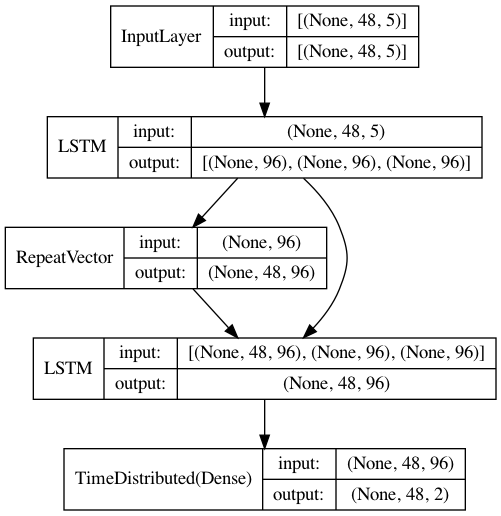

In [16]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [17]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.Huber(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=EPOCHS,
    batch_size=BATCH,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr]
)


Epoch 1/30
389/389 [==============================] - 11s 22ms/step - loss: 4.6980 - root_mean_squared_error: 8.6835 - val_loss: 4.2951 - val_root_mean_squared_error: 8.2532 - lr: 0.0010
Epoch 2/30
389/389 [==============================] - 8s 22ms/step - loss: 4.3377 - root_mean_squared_error: 8.2836 - val_loss: 4.2478 - val_root_mean_squared_error: 8.1164 - lr: 9.0000e-04
Epoch 3/30
389/389 [==============================] - 9s 24ms/step - loss: 4.2689 - root_mean_squared_error: 8.1826 - val_loss: 4.1629 - val_root_mean_squared_error: 8.0278 - lr: 8.1000e-04
Epoch 4/30
389/389 [==============================] - 11s 29ms/step - loss: 4.2068 - root_mean_squared_error: 8.1066 - val_loss: 4.1197 - val_root_mean_squared_error: 7.9979 - lr: 7.2900e-04
Epoch 5/30
389/389 [==============================] - 12s 30ms/step - loss: 4.1485 - root_mean_squared_error: 8.0506 - val_loss: 4.0604 - val_root_mean_squared_error: 7.8305 - lr: 6.5610e-04
Epoch 6/30
389/389 [==============================]

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error', 'lr'])


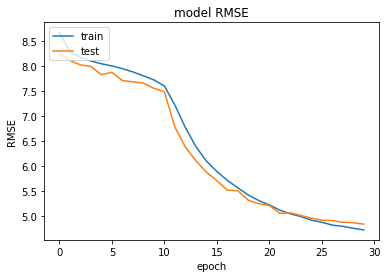

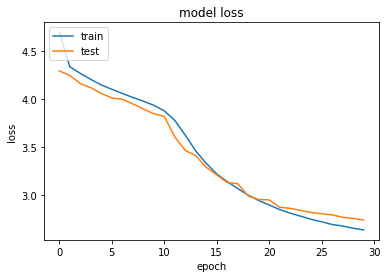

In [18]:
def plot_history(history, metric):
    # This function will plot the model fit process
    print(history.history.keys())
    # summarize history for accuracy
    if metric == "root_mean_squared_error":
        plt.plot(history.history['root_mean_squared_error'])
        plt.plot(history.history['val_root_mean_squared_error'])
        plt.title('model RMSE')
        plt.ylabel('RMSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
    elif metric == "mean_absolute_percentage_error":
        plt.plot(history.history["mean_absolute_percentage_error"])
        plt.plot(history.history["val_mean_absolute_percentage_error"])
        plt.title('model MAPE')
        plt.ylabel('MAPE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
    elif metric == "mean_absolute_error":
        plt.plot(history.history["mean_absolute_error"])
        plt.plot(history.history["val_mean_absolute_error"])
        plt.title('model MAE')
        plt.ylabel('MAE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_history(history, 'root_mean_squared_error')

In [19]:
#Make Predictions
y_preds = model.predict(x_test)


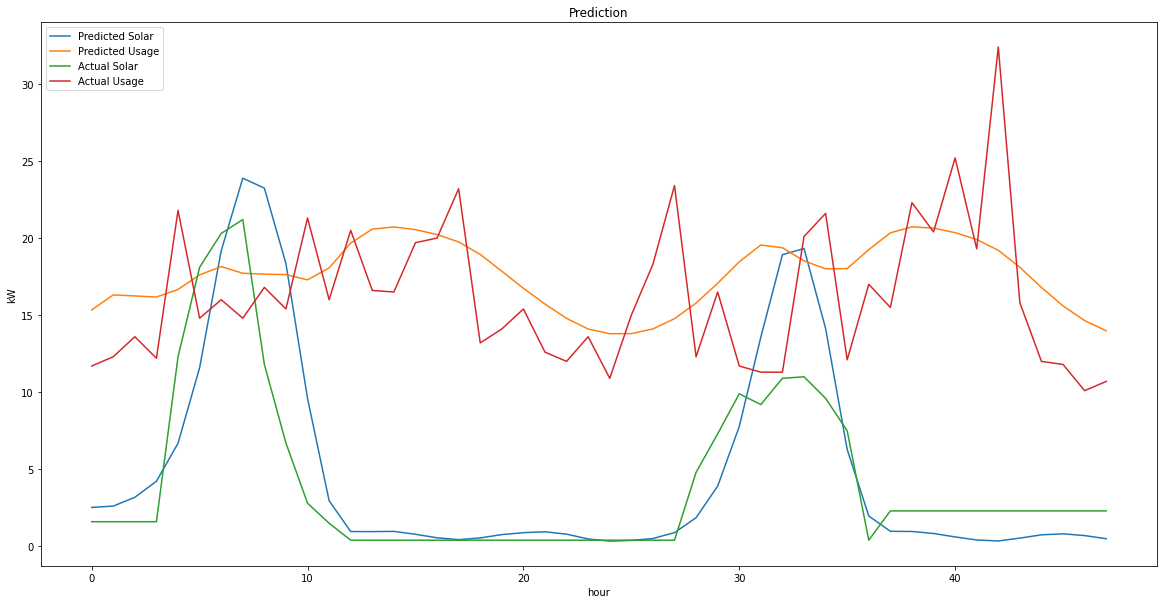

In [56]:
plt.figure(figsize=(20, 10))
plt.title('Prediction')
x = np.random.default_rng().integers(0, y_preds.shape[0])
plt.plot(y_preds[x,:,:])
plt.plot(y_test[x,:,:])
plt.ylabel('kW')
plt.xlabel('hour')
plt.legend(['Predicted Solar', 'Predicted Usage', 'Actual Solar', 'Actual Usage'], loc='upper left')

plt.show()